In [32]:
import pandas as pd
import numpy as np
import nltk
import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv("Tweets.csv", encoding = 'unicode_escape')

In [34]:
df.rename({"is_there_an_emotion_directed_at_a_brand_or_product": "Emotion",
          "tweet_text": "Text"}, axis = 1, inplace = True)

In [35]:
df.drop("emotion_in_tweet_is_directed_at", axis = 1, inplace = True)

In [36]:
df

,Text,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


In [37]:
df.Emotion.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64

In [38]:
df = df[df["Emotion"] != "I can't tell"]

In [39]:
df

,Text,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


In [40]:
import preprocessor as process

In [41]:
df.Text.iloc[90]

'Thanks to @mention for publishing the news of our new medical Apps in the #sxswi conf. blog {link} #sxsw #sxswh #mhealth'

In [42]:
clean = []
for i in range(len(df)):
    cleaned = process.clean(str(df.Text.iloc[i]))
    clean.append(cleaned)
df["Cleaned_Tweet"] = clean

In [43]:
df

,Text,Emotion,Cleaned_Tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,". I have a G iPhone. After hrs tweeting at , i..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,Know about ? Awesome iPad/iPhone app that you'...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,Can not wait for also. They should sale them d...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,I hope this year's festival isn't as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,"great stuff on Fri : Marissa Mayer (Google), T..."
...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,Ipad everywhere. {link}
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,"Wave, buzz... RT We interrupt your regularly s..."
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,"Google's Zeiger, a physician never reported po..."
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,Some Verizon iPhone customers complained their...


In [44]:
df.dropna(axis = 0, inplace = True)

In [45]:
df.isna().sum()

Text             0
Emotion          0
Cleaned_Tweet    0
dtype: int64

In [46]:
import re
new = []
for tweet in df.Cleaned_Tweet:
    x = re.finditer(r"([A-Za-z])([A-Za-z])+", tweet)
    new.append((' '.join([x1.group() for x1 in x])).lower())
df.Cleaned_Tweet = new

In [47]:
df

,Text,Emotion,Cleaned_Tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,have iphone after hrs tweeting at it was dead ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,know about awesome ipad iphone app that you ll...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,can not wait for also they should sale them do...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,hope this year festival isn as crashy as this ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,great stuff on fri marissa mayer google tim re...
...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,ipad everywhere link
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,wave buzz rt we interrupt your regularly sched...
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,google zeiger physician never reported potenti...
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,some verizon iphone customers complained their...


In [48]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append("rt")

In [49]:
df.Cleaned_Tweet = df.Cleaned_Tweet.apply(lambda x:" ".join([item for item in x.split() if item not in stop_words]))

In [50]:
df.drop("Text", axis = 1, inplace = True)

In [74]:
#!pip install google_trans_new
from google_trans_new import google_translator  
translator = google_translator()  
translated = translator.translate('我有一个很好的屁股，你知道吗？')

# the translate method returns an object
print(translated)
# translate back to English
#df.Cleaned_Tweet = [translator.translate(x, lang_tgt = 'en') for x in french]
#df.Cleaned_Tweet

I have a great ass, do you know? 


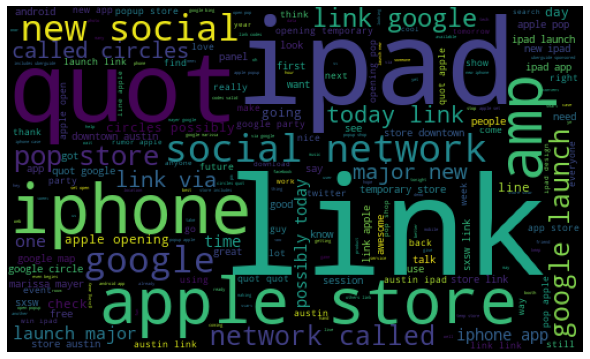

In [22]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
words = ' '.join([txt for txt in df.Cleaned_Tweet])
werds = WordCloud(width = 500, height = 300, max_font_size = 119).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(werds) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [23]:
new_words = ["link", "quot"]
df.Cleaned_Tweet = df.Cleaned_Tweet.apply(lambda x:" ".join([item for item in x.split() if item not in new_words]))

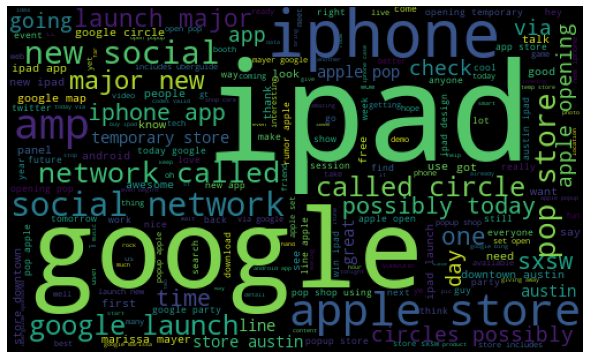

In [24]:
words = ' '.join([txt for txt in df.Cleaned_Tweet])
werds = WordCloud(width = 500, height = 300, max_font_size = 119).generate(words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(werds) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [25]:
from sklearn.model_selection import train_test_split
X = df.Cleaned_Tweet
y = df.Emotion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, stratify = y)

In [165]:
X_train.shape

(7595,)

In [166]:
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.text import Tokenizer
scaler = StandardScaler()
tokenizer = Tokenizer(num_words=300)
tokenizer.fit_on_texts(X_train)

X_train_tokens = tokenizer.texts_to_matrix(X_train, mode='tfidf')
X_test_tokens = tokenizer.texts_to_matrix(X_test, mode='tfidf')
X_train_transformed = scaler.fit_transform(X_train_tokens)
X_test_transformed = scaler.transform(X_test_tokens)
X_train_tokens.shape, X_train_transformed.shape

((7595, 300), (7595, 300))

In [167]:
from sklearn.preprocessing import LabelBinarizer
from keras.utils.np_utils import to_categorical
lb = LabelBinarizer()
lb.fit(y_train)

y_train_lb = to_categorical(lb.transform(y_train))[:,:,1]
y_test_lb = to_categorical(lb.transform(y_test))[:, :, 1]

In [168]:
y_train_lb.shape

(7595, 3)

In [169]:
from keras import models
from keras import layers
model_1 = models.Sequential()
model_1.add(layers.Dense(50, activation = 'relu', input_shape = (300,)))
model_1.add(layers.Dense(100, activation = 'relu'))
model_1.add(layers.Dense(3, activation = 'softmax'))

model_1.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])

In [38]:
model_1_val = model_1.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
27/27 [==============================] - 2s 45ms/step - loss: 1.1145 - acc: 0.4270 - val_loss: 0.9723 - val_acc: 0.5605
Epoch 2/150
27/27 [==============================] - 0s 5ms/step - loss: 0.9527 - acc: 0.5661 - val_loss: 0.9285 - val_acc: 0.5776
Epoch 3/150
27/27 [==============================] - 0s 6ms/step - loss: 0.9342 - acc: 0.5595 - val_loss: 0.9073 - val_acc: 0.5855
Epoch 4/150
27/27 [==============================] - 0s 6ms/step - loss: 0.9011 - acc: 0.5837 - val_loss: 0.8936 - val_acc: 0.5855
Epoch 5/150
27/27 [==============================] - 0s 6ms/step - loss: 0.8930 - acc: 0.5782 - val_loss: 0.8834 - val_acc: 0.5934
Epoch 6/150
27/27 [==============================] - 0s 5ms/step - loss: 0.8743 - acc: 0.5983 - val_loss: 0.8756 - val_acc: 0.5921
Epoch 7/150
27/27 [==============================] - 0s 6ms/step - loss: 0.8664 - acc: 0.5966 - val_loss: 0.8689 - val_acc: 0.6000
Epoch 8/150
27/27 [==============================] - 0s 6ms/step - loss: 0.8638 - 

27/27 [==============================] - 0s 8ms/step - loss: 0.6635 - acc: 0.7082 - val_loss: 0.7911 - val_acc: 0.6395
Epoch 64/150
27/27 [==============================] - 0s 6ms/step - loss: 0.6698 - acc: 0.7068 - val_loss: 0.7910 - val_acc: 0.6434
Epoch 65/150
27/27 [==============================] - 0s 5ms/step - loss: 0.6624 - acc: 0.7032 - val_loss: 0.7908 - val_acc: 0.6461
Epoch 66/150
27/27 [==============================] - 0s 12ms/step - loss: 0.6626 - acc: 0.7131 - val_loss: 0.7909 - val_acc: 0.6461
Epoch 67/150
27/27 [==============================] - 1s 18ms/step - loss: 0.6704 - acc: 0.7090 - val_loss: 0.7907 - val_acc: 0.6487
Epoch 68/150
27/27 [==============================] - 0s 10ms/step - loss: 0.6597 - acc: 0.7114 - val_loss: 0.7905 - val_acc: 0.6487
Epoch 69/150
27/27 [==============================] - 0s 6ms/step - loss: 0.6526 - acc: 0.7200 - val_loss: 0.7905 - val_acc: 0.6487
Epoch 70/150
27/27 [==============================] - 0s 13ms/step - loss: 0.6505 - ac

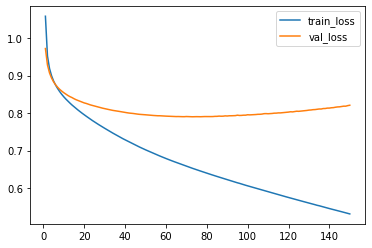

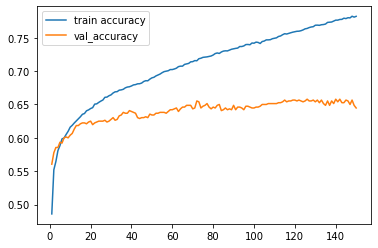

In [39]:
import matplotlib.pyplot as plt
history = model_1_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["loss"], label = "train_loss")
plt.plot(np.arange(1,151,1), history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
history = model_1_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["acc"], label = "train accuracy")
plt.plot(np.arange(1,151,1), history["val_acc"], label = "val_accuracy")
plt.legend()
plt.show()


In [40]:
results = model_1.evaluate(X_train_transformed, y_train_lb)
print(f'Training Loss: {results[0]:.3} \nTraining Accuracy: {results[1]:.3}')

238/238 [==============================] - 0s 1ms/step - loss: 0.5577 - acc: 0.7700
Training Loss: 0.558 
Training Accuracy: 0.77


In [41]:
results2 = model_1.evaluate(X_test_transformed, y_test_lb)
print(f'Testing Loss: {results2[0]:.3} \nTesting Accuracy: {results2[1]:.3}')

42/42 [==============================] - 0s 2ms/step - loss: 0.8077 - acc: 0.6510
Testing Loss: 0.808 
Testing Accuracy: 0.651


In [42]:
from keras.layers import Dropout
model_2 = models.Sequential()
model_2.add(layers.Dense(50, activation = 'relu', input_shape = (300,)))
model_2.add(Dropout(.2))
model_2.add(layers.Dense(100, activation = 'relu'))
model_2.add(Dropout(.2))
model_2.add(layers.Dense(3, activation = 'softmax'))

model_2.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])


In [43]:
model_2_val = model_2.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
27/27 [==============================] - 1s 16ms/step - loss: 1.3418 - acc: 0.3068 - val_loss: 0.9517 - val_acc: 0.5829
Epoch 2/150
27/27 [==============================] - 0s 8ms/step - loss: 1.0147 - acc: 0.5252 - val_loss: 0.9036 - val_acc: 0.5987
Epoch 3/150
27/27 [==============================] - 0s 7ms/step - loss: 0.9713 - acc: 0.5558 - val_loss: 0.8844 - val_acc: 0.6105
Epoch 4/150
27/27 [==============================] - 0s 5ms/step - loss: 0.9494 - acc: 0.5681 - val_loss: 0.8737 - val_acc: 0.6132
Epoch 5/150
27/27 [==============================] - 0s 8ms/step - loss: 0.9215 - acc: 0.5712 - val_loss: 0.8660 - val_acc: 0.6145
Epoch 6/150
27/27 [==============================] - 0s 7ms/step - loss: 0.9201 - acc: 0.5705 - val_loss: 0.8605 - val_acc: 0.6171
Epoch 7/150
27/27 [==============================] - 0s 5ms/step - loss: 0.9051 - acc: 0.5795 - val_loss: 0.8556 - val_acc: 0.6237
Epoch 8/150
27/27 [==============================] - 0s 8ms/step - loss: 0.9026 - 

Epoch 125/150
27/27 [==============================] - 0s 8ms/step - loss: 0.7028 - acc: 0.6909 - val_loss: 0.7649 - val_acc: 0.6579
Epoch 126/150
27/27 [==============================] - 0s 5ms/step - loss: 0.7119 - acc: 0.6857 - val_loss: 0.7647 - val_acc: 0.6592
Epoch 127/150
27/27 [==============================] - 0s 5ms/step - loss: 0.7119 - acc: 0.6861 - val_loss: 0.7649 - val_acc: 0.6579
Epoch 128/150
27/27 [==============================] - 0s 5ms/step - loss: 0.6976 - acc: 0.6917 - val_loss: 0.7646 - val_acc: 0.6579
Epoch 129/150
27/27 [==============================] - 0s 5ms/step - loss: 0.7001 - acc: 0.6822 - val_loss: 0.7647 - val_acc: 0.6592
Epoch 130/150
27/27 [==============================] - 0s 5ms/step - loss: 0.7046 - acc: 0.6898 - val_loss: 0.7645 - val_acc: 0.6605
Epoch 131/150
27/27 [==============================] - 0s 9ms/step - loss: 0.7031 - acc: 0.6805 - val_loss: 0.7644 - val_acc: 0.6618
Epoch 132/150
27/27 [==============================] - 0s 5ms/step - 

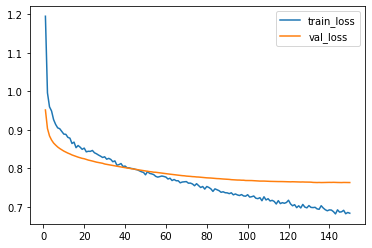

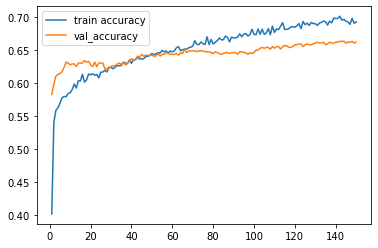

In [44]:
import matplotlib.pyplot as plt
history = model_2_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["loss"], label = "train_loss")
plt.plot(np.arange(1,151,1), history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
history = model_2_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["acc"], label = "train accuracy")
plt.plot(np.arange(1,151,1), history["val_acc"], label = "val_accuracy")
plt.legend()
plt.show()

In [45]:
model_2.evaluate(X_test_transformed, y_test_lb)

42/42 [==============================] - 0s 1ms/step - loss: 0.7730 - acc: 0.6428


[0.773002564907074, 0.6428039073944092]

In [171]:
tokenizer = Tokenizer(num_words=300)
tokenizer.fit_on_texts(X_train)

X_train_tokens = tokenizer.texts_to_matrix(X_train, mode= "tfidf")
X_test_tokens = tokenizer.texts_to_matrix(X_test, mode= "tfidf")
X_train_tokens.shape

(7595, 300)

In [218]:
from sklearn.model_selection import train_test_split
X = df.Cleaned_Tweet
y = df.Emotion
df_train, df_test = train_test_split(df, test_size = .15, stratify = df.Emotion)
X_test, y_test = df_test.Cleaned_Tweet, df_test.Emotion
X_test.shape

(1341,)

In [219]:
df_negative = df_train[df_train["Emotion"] == "Negative emotion"].sample(5388, replace = True)
df_positive = df_train[df_train["Emotion"] == "Positive emotion"].sample(5388, replace = True)
df_neutral = df[df["Emotion"] == "No emotion toward brand or product"]

In [220]:
df_train = pd.concat([df_negative, df_positive, df_neutral], axis = 0)
df_train = df_train.sample(frac=1, axis=0).reset_index(drop=True)
df_train["Emotion"].value_counts()

Negative emotion                      5388
Positive emotion                      5388
No emotion toward brand or product    5388
Name: Emotion, dtype: int64

In [221]:
X_train, y_train = df_train.Cleaned_Tweet, df_train.Emotion


In [222]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
def lem_tokenize(tweet):
    return [lem.lemmatize(x) for x in tweet.split()]

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 750, ngram_range = (1,2), tokenizer = (lem_tokenize))
X_train_tokens = vectorizer.fit_transform(X_train).todense()
X_test_tokens = vectorizer.transform(X_test).todense()

In [224]:
from sklearn.preprocessing import LabelBinarizer
from keras.utils.np_utils import to_categorical
lb = LabelBinarizer()
lb.fit(y_train)
y_train_lb = to_categorical(lb.transform(y_train))[:,:,1]
y_test_lb = to_categorical(lb.transform(y_test))[:, :, 1]

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_tokens)
X_test_transformed = scaler.transform(X_test_tokens)
X_train_transformed.shape

(16164, 750)

In [226]:
from keras import models
from keras import layers
from keras.layers import Dropout
model_3 = models.Sequential()
model_3.add(layers.Dense(16, activation = 'relu', input_shape = (750,)))
model_3.add(Dropout(.2))
model_3.add(layers.Dense(32, activation = 'relu'))
model_3.add(Dropout(.2))
model_3.add(layers.Dense(3, activation = 'softmax'))

model_3.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])

In [181]:
model_3_val = model_3.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
57/57 [==============================] - 1s 8ms/step - loss: 1.2119 - acc: 0.3501 - val_loss: 1.0958 - val_acc: 0.3976
Epoch 2/150
57/57 [==============================] - 0s 4ms/step - loss: 1.1518 - acc: 0.3620 - val_loss: 1.0622 - val_acc: 0.4317
Epoch 3/150
57/57 [==============================] - 0s 3ms/step - loss: 1.1024 - acc: 0.3968 - val_loss: 1.0390 - val_acc: 0.4583
Epoch 4/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0851 - acc: 0.4100 - val_loss: 1.0201 - val_acc: 0.4731
Epoch 5/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0596 - acc: 0.4303 - val_loss: 1.0041 - val_acc: 0.4960
Epoch 6/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0449 - acc: 0.4459 - val_loss: 0.9900 - val_acc: 0.5127
Epoch 7/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0258 - acc: 0.4675 - val_loss: 0.9751 - val_acc: 0.5300
Epoch 8/150
57/57 [==============================] - 0s 4ms/step - loss: 1.0048 - a

Epoch 125/150
57/57 [==============================] - 0s 4ms/step - loss: 0.4167 - acc: 0.8171 - val_loss: 0.4064 - val_acc: 0.8250
Epoch 126/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4199 - acc: 0.8126 - val_loss: 0.4054 - val_acc: 0.8225
Epoch 127/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4228 - acc: 0.8047 - val_loss: 0.4040 - val_acc: 0.8250
Epoch 128/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4093 - acc: 0.8146 - val_loss: 0.4037 - val_acc: 0.8281
Epoch 129/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4101 - acc: 0.8198 - val_loss: 0.4023 - val_acc: 0.8256
Epoch 130/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4173 - acc: 0.8171 - val_loss: 0.4009 - val_acc: 0.8306
Epoch 131/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4168 - acc: 0.8200 - val_loss: 0.4012 - val_acc: 0.8293
Epoch 132/150
57/57 [==============================] - 0s 3ms/step - 

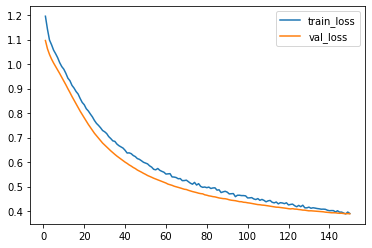

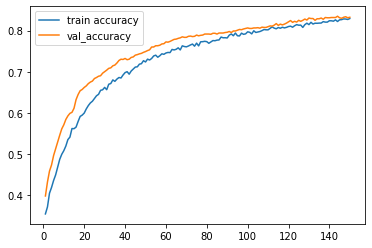

In [182]:
import matplotlib.pyplot as plt
history = model_3_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["loss"], label = "train_loss")
plt.plot(np.arange(1,151,1), history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
history = model_3_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["acc"], label = "train accuracy")
plt.plot(np.arange(1,151,1), history["val_acc"], label = "val_accuracy")
plt.legend()
plt.show()

In [183]:
model_3.evaluate(X_test_transformed, y_test_lb)

42/42 [==============================] - 0s 1ms/step - loss: 0.8849 - acc: 0.7069


[0.8848961591720581, 0.7069351077079773]

In [184]:
confusion_matrix(y_train_lb.argmax(axis = 1), model_3.predict(X_train_transformed).argmax(axis = 1))

array([[5319,   42,   27],
       [ 134, 4337,  917],
       [  40,  843, 4505]])

In [185]:
from sklearn.metrics import confusion_matrix
pred = model_3.predict(X_test_transformed).argmax(axis = 1)
y_test_labels = y_test_lb.argmax(axis = 1)
matrix = confusion_matrix(y_test_labels, pred)
matrix

array([[ 34,  35,  16],
       [ 22, 657, 130],
       [ 21, 169, 257]])

In [227]:
model_4 = models.Sequential()
model_4.add(layers.Dense(16, activation = 'relu', input_shape = (750,)))
model_4.add(Dropout(.2))
model_4.add(layers.Dense(32, activation = 'relu'))
model_4.add(Dropout(.2))
model_4.add(layers.Dense(16, activation = 'relu'))
model_4.add(Dropout(.2))
model_4.add(layers.Dense(3, activation = 'softmax'))

model_4.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])


model_4.compile(optimizer='Adam', 
                   loss='mse', 
                   metrics=['acc'])

In [228]:
model_4_val = model_4.fit(X_train_transformed, y_train_lb, epochs = 150,
                         batch_size = 256, validation_split=.1,)

Epoch 1/150
57/57 [==============================] - 1s 8ms/step - loss: 0.2382 - acc: 0.3544 - val_loss: 0.2008 - val_acc: 0.5003
Epoch 2/150
57/57 [==============================] - 0s 4ms/step - loss: 0.2046 - acc: 0.4691 - val_loss: 0.1717 - val_acc: 0.6246
Epoch 3/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1790 - acc: 0.5627 - val_loss: 0.1450 - val_acc: 0.6753
Epoch 4/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1559 - acc: 0.6308 - val_loss: 0.1276 - val_acc: 0.7025
Epoch 5/150
57/57 [==============================] - 0s 4ms/step - loss: 0.1379 - acc: 0.6872 - val_loss: 0.1176 - val_acc: 0.7396
Epoch 6/150
57/57 [==============================] - 0s 4ms/step - loss: 0.1244 - acc: 0.7172 - val_loss: 0.1102 - val_acc: 0.7532
Epoch 7/150
57/57 [==============================] - 0s 5ms/step - loss: 0.1175 - acc: 0.7425 - val_loss: 0.1037 - val_acc: 0.7638
Epoch 8/150
57/57 [==============================] - 0s 6ms/step - loss: 0.1111 - a

57/57 [==============================] - 0s 5ms/step - loss: 0.0424 - acc: 0.9171 - val_loss: 0.0769 - val_acc: 0.8590
Epoch 125/150
57/57 [==============================] - 0s 6ms/step - loss: 0.0442 - acc: 0.9144 - val_loss: 0.0778 - val_acc: 0.8621
Epoch 126/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0450 - acc: 0.9139 - val_loss: 0.0794 - val_acc: 0.8596
Epoch 127/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0442 - acc: 0.9153 - val_loss: 0.0789 - val_acc: 0.8596
Epoch 128/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0441 - acc: 0.9152 - val_loss: 0.0779 - val_acc: 0.8565
Epoch 129/150
57/57 [==============================] - 0s 4ms/step - loss: 0.0435 - acc: 0.9171 - val_loss: 0.0775 - val_acc: 0.8596
Epoch 130/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0435 - acc: 0.9183 - val_loss: 0.0748 - val_acc: 0.8658
Epoch 131/150
57/57 [==============================] - 0s 5ms/step - loss: 0.0444 -

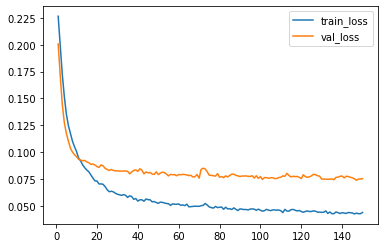

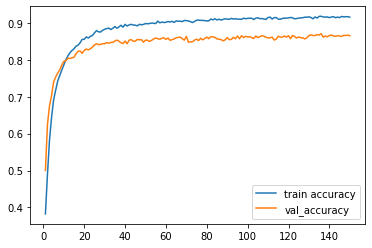

In [229]:
history = model_4_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["loss"], label = "train_loss")
plt.plot(np.arange(1,151,1), history["val_loss"], label = "val_loss")
plt.legend()
plt.show()
history = model_4_val.history
plt.figure()
plt.plot(np.arange(1,151,1), history["acc"], label = "train accuracy")
plt.plot(np.arange(1,151,1), history["val_acc"], label = "val_accuracy")
plt.legend()
plt.show()

In [230]:
model_4.evaluate(X_test_transformed, y_test_lb, batch_size=128)

11/11 [==============================] - 0s 2ms/step - loss: 0.1570 - acc: 0.7353


[0.15696391463279724, 0.7352721691131592]

In [124]:
pred = model_4.predict(X_test_transformed).argmax(axis = 1)
y_test_labels = y_test_lb.argmax(axis = 1)
matrix = confusion_matrix(y_test_labels, pred)
matrix

array([[ 23,  53,   9],
       [ 23, 728,  58],
       [  9, 220, 218]])

In [68]:
pred = model_4.predict(X_test_transformed)
pred[model_4.predict(X_test_transformed).argmax(axis = 1)==0]
pred_df = pd.DataFrame(X_test)
pred_df["Negative"] = 0
pred_df["Neutral"] = 0
pred_df["Positive"] = 0
pred_df[["Negative", "Neutral", "Positive"]] = pred
pred_df["Label"] = y_test
pred_df

,Cleaned_Tweet,Negative,Neutral,Positive,Label
1131,anyone show iphone charger need tweet jokes be...,2.219859e-11,1.000000,3.020135e-21,No emotion toward brand or product
3574,anti social irl typing ipad social tv session ...,8.462668e-23,0.992573,7.427268e-03,No emotion toward brand or product
1432,toptweets rumor apple opening temporary store ...,2.529701e-07,0.811959,1.880405e-01,No emotion toward brand or product
2310,awkward jc penneys question asked marissa maye...,9.296409e-25,1.000000,1.156578e-15,No emotion toward brand or product
5141,new ipad apps speech therapy communication sho...,8.593644e-05,0.533523,4.663908e-01,No emotion toward brand or product
...,...,...,...,...,...
3036,mistakes made building netflix iphone sxsw,9.274502e-05,0.997719,2.188190e-03,No emotion toward brand or product
55,talking google effort allow users open systems,4.268953e-18,1.000000,1.189560e-08,Positive emotion
1072,current screen browser upload application,8.512523e-12,0.975335,2.466536e-02,No emotion toward brand or product
3194,friend told talking smart bikes check google p...,5.758184e-14,0.999998,2.038201e-06,No emotion toward brand or product


In [70]:
pred_df[(pred_df["Negative"] > .2) & (pred_df["Label"] != "Negative emotion")]

,Cleaned_Tweet,Negative,Neutral,Positive,Label
6516,best thing heard weekend gave ipad money relie...,1.000000,1.310807e-27,0.000000e+00,No emotion toward brand or product
1613,new app store includes uberguide,0.390354,4.454145e-01,1.642320e-01,No emotion toward brand or product
2854,already seeing heavy ipad presence,0.400241,5.993559e-01,4.035910e-04,Positive emotion
3234,loving apple pop downtown office long last us ...,0.968841,1.158053e-02,1.957862e-02,Positive emotion
6518,best thing heard weekend gave ipad money relie...,1.000000,1.310807e-27,0.000000e+00,No emotion toward brand or product
5541,bad news update pop apple store ipads sure tom...,0.983071,1.692875e-02,1.472538e-13,No emotion toward brand or product
2184,iphone paul reubens,0.648009,3.074586e-01,4.453250e-02,No emotion toward brand or product
8249,ad jg buat iphone new app store includes uberg...,0.548064,2.527302e-01,1.992055e-01,No emotion toward brand or product
8206,hmmm bit weird tending google circle,0.505365,4.946353e-01,0.000000e+00,No emotion toward brand or product
7767,awesome best thing heard wknd gave ipad money ...,1.000000,4.305124e-12,0.000000e+00,No emotion toward brand or product


In [64]:
df.loc[6518]

Emotion                         No emotion toward brand or product
Cleaned_Tweet    best thing heard weekend gave ipad money relie...
Name: 6518, dtype: object

In [200]:
import spacy
nlp = spacy.load("en_core_web_md")

In [201]:
cleaned = [nlp(x) for x in X_train]
cleaned

[apple cited opposite crowdsourcing proprietary steve jobs tells want,
 spark award read,
 massive fail run semi full parked front,
 people apple store smell great,
 hey app download android app market heads,
 another late start damn google rocking party,
 hope year festival crashy year iphone app,
 tries social network time launched perhaps wha cont,
 ipad sale cc,
 srsly rumor apple temporary store downtown austin ipad launch,
 interesting tweet stream follow one google amp bing amp someone msn lol,
 like ipoo app iphone ha chan internet bathroom wall,
 hawk ipad festival popup store,
 google scale tiny changes even colors blue meaningful optimum shade blue links,
 lines temp apple store austin yet,
 ipad conflagration doofusness,
 highlight day undoubtedly meeting google seconds softball fancrazed preso,
 pdparticle said able get ipad apple opening pop store,
 dude earthquakes tsunamis ipad get,
 apple like crack house mac addicts,
 man panhandling ipad sxsw whats world coming,
 iph

In [202]:
train_x_vectors = [x.vector for x in cleaned]

In [203]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x_vectors, y_train)

SVC(kernel='linear')

In [204]:
test = [nlp(x) for x in X_test]
cleaned_x = [x.vector for x in test]

In [205]:
clf.score(cleaned_x, y_test)

0.5973154362416108

In [70]:
test = ["hey"]
test_doc = [nlp(x) for x in test]
vec = [x.vector for x in test_doc]

clf.predict(vec)

array(['No emotion toward brand or product'], dtype=object)

In [172]:
df.Emotion.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
Name: Emotion, dtype: int64

In [271]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [272]:
rf.score(X_test_transformed, y_test)

0.738255033557047

In [273]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier()
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3 ,6]
}

rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_transformed, y_train)
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [274]:
rf_grid_search.best_score_

0.8855481316505815

In [138]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy',
  max_depth = None,
  min_samples_leaf = 1,
  min_samples_split = 2)
forest.fit(X_train_transformed, y_train)


RandomForestClassifier(criterion='entropy')

In [139]:
y_test.value_counts()

No emotion toward brand or product    809
Positive emotion                      447
Negative emotion                       85
Name: Emotion, dtype: int64

In [141]:
forest.score(X_test_transformed, y_test)

0.7285607755406414

In [267]:
rf_grid_search.best_score_, rf_grid_search.best_params_

(0.8835684236575104,
 {'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

In [125]:
y_pred=model.predict(X_test_tokens)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

                                    precision    recall  f1-score   support

                  Negative emotion       0.30      0.38      0.34        82
No emotion toward brand or product       0.75      0.75      0.75       813
                  Positive emotion       0.59      0.57      0.58       446

                          accuracy                           0.67      1341
                         macro avg       0.55      0.57      0.56      1341
                      weighted avg       0.67      0.67      0.67      1341



In [268]:
from sklearn import svm
clf = svm.SVC(kernel = "linear")
clf.fit(X_train_tokens, y_train)

SVC(kernel='linear')

In [269]:
preds = clf.predict(X_test_tokens)

In [270]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.6256524981357197

In [49]:
results_test = model_1.evaluate(X_test_tokens, y_test_lb)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

42/42 [==============================] - 0s 2ms/step - loss: 0.7477 - acc: 0.6846
Test Loss: 0.748 
Test Accuracy: 0.685


In [225]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(max_features = 500)

X_train_transformed = vector.fit_transform(X_train)
X_test_transformed = vector.transform(X_test)
vector.get_feature_names()
data = pd.DataFrame(vector.fit_transform(X_train).toarray())

In [226]:
data

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
from sklearn.feature_extraction.text import CountVectorizer 
vector = CountVectorizer(max_features = 500)
X_train_transformed = vector.fit_transform(X_train)
y_train = pd.get_dummies(y_train).values.argmax(1)
y_test = pd.get_dummies(y_test).values.argmax(1)

In [196]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear')

In [197]:
y_train.shape

(16164,)

In [198]:
clf.fit(X_train_transformed, y_train)

SVC(kernel='linear')

In [199]:
X_test_transformed = vector.transform(X_test)

In [200]:
from sklearn.metrics import accuracy_score
clf.score(X_test_transformed, y_test)

0.6219239373601789